In [31]:
import pandas as pd

#Use matplotlib to create a scatter plot
df = pd.read_csv('epa-sea-level.csv', sep = ',')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,2023,NaN,NaN,NaN,10.203904
1,2022,NaN,NaN,NaN,9.974711
2,2021,NaN,NaN,NaN,9.886688
3,2020,NaN,NaN,NaN,9.699874
4,2019,NaN,NaN,NaN,9.594329


Text(0, 0.5, 'Sea Level (inches)')

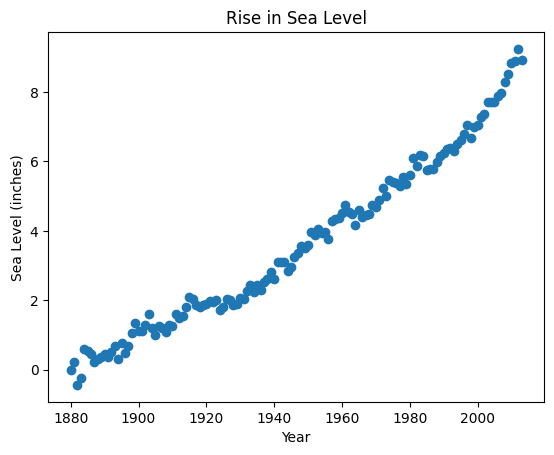

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np


#Use matplotlib to create a scatter plot using the Year column 
# as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

#Use the linregress function from scipy.stats to get the slope 
# and y-intercept of the line of best fit. Plot the line of best 
# fit over the top of the scatter plot. Make the line go through 
# the year 2050 to predict the sea level rise in 2050.
fit1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
years_extended = np.arange(df['Year'].min(), 2051, 1)

y_pred_extended = fit1.intercept + fit1.slope * years_extended
plt.plot(years_extended, y_pred_extended, color='red',label="Best Fit Line to 2050")

#Plot a new line of best fit just using the data from year 
# 2000 through the most recent year in the dataset. 
# Make the line also go through the year 2050 to predict 
# the sea level rise in 2050 if the rate of rise continues 
# as it has since the year 2000.
years_2000=df[df['Year']>=2000]
years_2000=np.arange(years_2000['Year'].min(), 2051, 1)

y_pred_extended2 = fit1.intercept + fit1.slope * years_2000
plt.plot(years_2000, y_pred_extended2, color='yellow',label="Best Fit Line to 2050")

#The x label should be Year, the y label should be Sea Level 
# (inches), and the title should be Rise in Sea Level.
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')